# Project: Writing a Datascientist Blogpot- [Seattle Airbnb]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#exploration">Exploration and Wrangling</a></li>
<li><a href="#prep">Data Preparation for the Model</a></li>
<li><a href="#model">Training and Scoring the Model</a></li>

</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project will be handling 3 CSV files, it will answer 4 Questions, two of them will be in this notebook and each of the other two questions will be in a separate notebook.

> This Notebook will handle the table called 'listings' explore it, manipulate it and use it to answer the following questions.


### Raised Research Questions:

## Question 1 :<br>

### To what extent can we predict the price of a listing based on all other parameters in this Dataset?<br>
<br>
<br>
<br>

## Question 2 :<br>

### What parameters can a unit owner change to increase the price of a listing? <br>
<br>



Importing the data exploration libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline

Importing the machine learning libraries

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score


loading the data

In [3]:
df=pd.read_csv('listings.csv')

<a id='exploration'></a>
## Exploration and Wrangling

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Cannot see all the column names along with the data types it contains.

Lets see the percentage of nulls in each column

In [5]:
for i in df.columns:
    print(f"{i:<32}" +' %  Nulls: ' + f"{str(int((df[i].isnull().sum()/len(df))*100)) : >10}")

id                               %  Nulls:          0
listing_url                      %  Nulls:          0
scrape_id                        %  Nulls:          0
last_scraped                     %  Nulls:          0
name                             %  Nulls:          0
summary                          %  Nulls:          4
space                            %  Nulls:         14
description                      %  Nulls:          0
experiences_offered              %  Nulls:          0
neighborhood_overview            %  Nulls:         27
notes                            %  Nulls:         42
transit                          %  Nulls:         24
thumbnail_url                    %  Nulls:          8
medium_url                       %  Nulls:          8
picture_url                      %  Nulls:          0
xl_picture_url                   %  Nulls:          8
host_id                          %  Nulls:          0
host_url                         %  Nulls:          0
host_name                   

Many columns have data that provide no value and no value can be extracted through feature engineering.

Will do an initial drop and inspect the rest of the columns accordingly

In [6]:
df=df.drop(['listing_url','thumbnail_url','medium_url' , 'picture_url','xl_picture_url','scrape_id','last_scraped',
            'experiences_offered','picture_url','requires_license','license','jurisdiction_names','state','city','market'
            ,'smart_location','country_code','country','longitude','latitude','square_feet','has_availability',
            'calendar_last_scraped','host_url','host_name','host_location','host_about','host_thumbnail_url',
            'host_picture_url','street','availability_30','availability_60','availability_90','first_review',
            'last_review'],axis=1)

Lets look at the data types

In [7]:
for i in df.columns:
    print(f"{i:<32}" +'  : '+ str(df[i].dtypes))

id                                : int64
name                              : object
summary                           : object
space                             : object
description                       : object
neighborhood_overview             : object
notes                             : object
transit                           : object
host_id                           : int64
host_since                        : object
host_response_time                : object
host_response_rate                : object
host_acceptance_rate              : object
host_is_superhost                 : object
host_neighbourhood                : object
host_listings_count               : float64
host_total_listings_count         : float64
host_verifications                : object
host_has_profile_pic              : object
host_identity_verified            : object
neighbourhood                     : object
neighbourhood_cleansed            : object
neighbourhood_group_cleansed      : object
zipcode    

Many numerical columns are formated as objects, will need to change them to float for easier exploration

In [ ]:
def numeric_converter(df):
    """
    this function converts objects that contain numerical variables to just numerical variables of the type 'float'
    
    """
    for i in df.columns:
        df[i]=df[i].str.strip('% $ ,')
        df[i]=df[i].str.replace(',', '')
        df[i]=pd.to_numeric(df[i],downcast='float')
    return df

df[['host_response_rate','price','security_deposit','cleaning_fee'
    ,'weekly_price','monthly_price','extra_people']]=numeric_converter(df[['host_response_rate','price','security_deposit'
                                                                           ,'cleaning_fee','weekly_price','monthly_price'
                                                                           ,'extra_people']])



Instead of dropping the below columns directly, will try to see if there's a correlation between a positive language and the unit price

The below columns have no sentiment as per definition, so will check if the length of the description affects the demand of unit which would affect the price

In [9]:
cols=['notes','transit']

This line replaces the string with the length of its characters

In [10]:
for i in cols:
    df[i]=df[i].str.len()

In [11]:
df_sent1=df[['id','name','summary','space','description']]

Filling the nulls with a neutral word because the sentiment analyzer does not work with nulls

In [12]:
df_sent1=df_sent1.fillna('none')

Defining a function and using it to replace each of the columns defined above in (df_sent1) with their sentiment value

In [13]:
def Analyze(df):
    
    """
    input: df:a dataframe
    
    output: object_df: a dataframe containing 1 row of the sentiment retrived from NLTK library
    
    """
    
    
    def senti (phrase):
        sia = SentimentIntensityAnalyzer()        
        return sia.polarity_scores(phrase)['compound']
    
    object_df=df.select_dtypes(include=['object'])
    for i in object_df.columns:
        object_df[i]=object_df[i].apply(senti)
    
    return object_df          
analyzed_df=Analyze(df_sent1)
analyzed_df

<ipython-input-13-96168b7cfd7a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df[i]=object_df[i].apply(senti)


,name,summary,space,description
0,0.0000,0.0000,0.8439,0.8439
1,0.4404,-0.6151,0.9958,0.9926
2,0.0000,0.7425,0.9360,0.9665
3,0.0000,0.6369,0.0000,0.6369
4,0.5859,0.8356,0.9077,0.9689
...,...,...,...,...
3813,0.0000,0.0000,0.9885,0.9850
3814,0.0000,0.5574,0.7003,0.5346
3815,0.0000,0.9121,0.0000,0.9121
3816,0.7644,0.8513,0.8960,0.9643


In [14]:
analyzed_df['sum'] = analyzed_df.sum(axis=1)

In [15]:
analyzed_df

,name,summary,space,description,sum
0,0.0000,0.0000,0.8439,0.8439,1.6878
1,0.4404,-0.6151,0.9958,0.9926,1.8137
2,0.0000,0.7425,0.9360,0.9665,2.6450
3,0.0000,0.6369,0.0000,0.6369,1.2738
4,0.5859,0.8356,0.9077,0.9689,3.2981
...,...,...,...,...,...
3813,0.0000,0.0000,0.9885,0.9850,1.9735
3814,0.0000,0.5574,0.7003,0.5346,1.7923
3815,0.0000,0.9121,0.0000,0.9121,1.8242
3816,0.7644,0.8513,0.8960,0.9643,3.4760


Plotting the correlation between price and description:

0.0038913670040061146

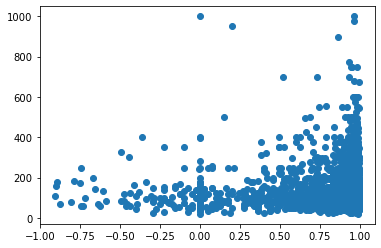

In [63]:
plt.scatter(x=analyzed_df['description'],y=df['price']);
analyzed_df['description'].corr(df['price'])

There seem to be no correlation between any of the above columns and price

A scatter plot was made for the other features and there was no correlation as well, so it will be better to drop them:

Checking if there was a correlation between the price and the scores as well:

C:\Users\ajax2\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-17-dda7179e2eb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_scores_total']=df1['review_scores_rating']+df1['review_scores_accuracy']+df1['review_scores_cleanliness']+df1.review_scores_checkin


-0.020269655985929252

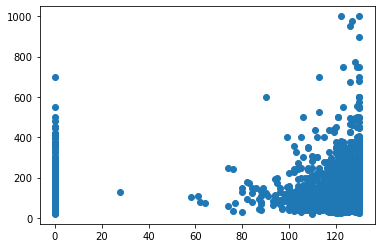

In [17]:
df1= df[['id', 'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_value']]
df1.fillna(0,inplace=True)

df1['review_scores_total']=df1['review_scores_rating']+df1['review_scores_accuracy']+df1['review_scores_cleanliness']+df1.review_scores_checkin
+df1.review_scores_communication+df1.review_scores_value;

plt.scatter(x=df1['review_scores_total'],y=df['price']);
df1['review_scores_total'].corr(df['price'])

There seems to be no corrleation as well

Drop the columns as they provide no value

In [18]:
df=df.drop(['name','summary','space','description','notes','transit','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_value','review_scores_location','neighborhood_overview'],axis=1)

Create a function that splits columns with multiple strings into separate columns and another function to count them

Save the amenities column into a dataframe:

In [19]:
df2=df[['amenities']]
df2

,amenities
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...
3813,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


The following two functions will convert the 'amenities' column into a separately dummified version:

In [20]:
def untangle(df):
    
    """
    input: a column of text separated by commas
    
    output:a dataframe with ones in the place of items not in the string
    
    """
    
    
    for j in range(len(df)):
        for i in str(df['amenities'][j]).strip('{}').split(','): 
            if i not in df.columns:
                df[i]=1
            else:
                df[i][j]=0
    return df
        

def labeler(x):
    """
    reverses the ones to zeroes and vice versa
    """ 
        if x==0:
            return 1
        else:
            return 0

Looking at the amenities dataframe:

In [21]:
df_amenities= untangle(df2).applymap(labeler)
df_amenities=df_amenities.drop(['amenities'],axis=1)

df_amenities

<ipython-input-20-a98d2710888d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=1
<ipython-input-20-a98d2710888d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=0
<ipython-input-21-5849ec63a5b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amenities= untangle(df2).applymap(labeler)


,TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer,...,"""Elevator in Building""","""Lock on Bedroom Door""","""Wheelchair Accessible""",Gym,,Pool,"""Smoking Allowed""","""Other pet(s)""",Doorman,"""Washer / Dryer"""
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3814,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,0,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3816,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Looking at string columns and numeric columns to see if there are furhter columns to be dropped:

col_0,% observations
host_since,
2008-11-10,0.001048
2009-01-08,0.000262
2009-02-16,0.000524
2009-03-03,0.000262
2009-03-30,0.000262
...,...
2015-12-29,0.000262
2015-12-30,0.000262
2016-01-01,0.000262


# of unique values 1380


col_0,% observations
host_response_time,
a few days or more,0.011533
within a day,0.181184
within a few hours,0.293778
within an hour,0.513505


# of unique values 4


col_0,% observations
host_acceptance_rate,
0%,0.000328
100%,0.999672


# of unique values 2


col_0,% observations
host_is_superhost,
f,0.796122
t,0.203878


# of unique values 2


col_0,% observations
host_neighbourhood,
Alki,0.006254
Anaheim,0.001990
Arbor Heights,0.000853
Atlantic,0.013928
Baldwin Hills,0.000284
...,...
Wallingford,0.038090
Wedgewood,0.004548
Westlake,0.003411


# of unique values 102


col_0,% observations
host_verifications,
None,0.000524
"['email', 'facebook', 'google', 'linkedin', 'reviews', 'kba']",0.000262
"['email', 'facebook', 'reviews', 'jumio']",0.000786
"['email', 'facebook', 'reviews', 'kba']",0.000262
"['email', 'facebook', 'reviews']",0.000786
...,...
"['phone', 'reviews', 'kba']",0.000524
"['phone', 'reviews']",0.007858
['phone'],0.005238


# of unique values 116


col_0,% observations
host_has_profile_pic,
f,0.001834
t,0.998166


# of unique values 2


col_0,% observations
host_identity_verified,
f,0.214623
t,0.785377


# of unique values 2


col_0,% observations
neighbourhood,
Alki,0.006761
Arbor Heights,0.000882
Atlantic,0.014697
Ballard,0.062610
Belltown,0.059965
...,...
Wallingford,0.042034
Wedgewood,0.004409
Westlake,0.003527


# of unique values 81


col_0,% observations
neighbourhood_cleansed,
Adams,0.018334
Alki,0.011001
Arbor Heights,0.001310
Atlantic,0.013882
Belltown,0.061289
...,...
West Woodland,0.016763
Westlake,0.004453
Whittier Heights,0.006810


# of unique values 87


col_0,% observations
neighbourhood_group_cleansed,
Ballard,0.060241
Beacon Hill,0.030906
Capitol Hill,0.148507
Cascade,0.023311
Central Area,0.096647
Delridge,0.020691
Downtown,0.138816
Interbay,0.002881
Lake City,0.017548


# of unique values 17


col_0,% observations
zipcode,
98101,0.052742
98102,0.088953
98103,0.103385
98104,0.024928
98105,0.059040
98106,0.015219
98107,0.047232
98108,0.014694
98109,0.053004


# of unique values 28


col_0,% observations
is_location_exact,
f,0.106338
t,0.893662


# of unique values 2


col_0,% observations
property_type,
Apartment,0.447472
Bed & Breakfast,0.009693
Boat,0.002096
Bungalow,0.003406
Cabin,0.005502
Camper/RV,0.003406
Chalet,0.000524
Condominium,0.023841
Dorm,0.000524


# of unique values 16


col_0,% observations
room_type,
Entire home/apt,0.665532
Private room,0.303824
Shared room,0.030644


# of unique values 3


col_0,% observations
bed_type,
Airbed,0.007072
Couch,0.003405
Futon,0.019382
Pull-out Sofa,0.012310
Real Bed,0.957831


# of unique values 5


col_0,% observations
amenities,
"{""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",Heating,Washer,Dryer,""Smoke Detector"",Essentials,Shampoo,""Lock on Bedroom Door"",Hangers}",0.000262
"{""Cable TV"",""Elevator in Building"",Heating,Washer,Dryer}",0.000262
"{""Cable TV"",""Wireless Internet"",""Air Conditioning"",""Free Parking on Premises"",Breakfast,""Pets live on this property"",Dog(s),""Indoor Fireplace"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Fire Extinguisher"",Essentials,Shampoo}",0.000262
"{""Cable TV"",""Wireless Internet"",""Air Conditioning"",""Wheelchair Accessible"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,""24-Hour Check-in"",Hangers,Iron,""Laptop Friendly Workspace""}",0.000262
"{""Cable TV"",""Wireless Internet"",""Air Conditioning"",Breakfast,""Pets live on this property"",Cat(s),Heating,""Smoke Detector"",""First Aid Kit"",Essentials,Shampoo,Hangers,""Hair Dryer""}",0.000262
...,...
"{TV,Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",0.000262
"{TV,Pool,Kitchen,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,Shampoo}",0.000262
"{TV,Pool,Kitchen,""Pets Allowed"",Gym,""Pets live on this property"",Dog(s),Cat(s),""Elevator in Building"",""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,Essentials,Hangers,Iron,""Laptop Friendly Workspace""}",0.000262


# of unique values 3284


col_0,% observations
calendar_updated,
1 week ago,0.006810
10 months ago,0.002095
11 months ago,0.001310
12 months ago,0.001310
13 months ago,0.000524
14 months ago,0.000262
15 months ago,0.000262
16 months ago,0.000262
17 months ago,0.000262


# of unique values 34


col_0,% observations
instant_bookable,
f,0.845207
t,0.154793


# of unique values 2


col_0,% observations
cancellation_policy,
flexible,0.301205
moderate,0.327658
strict,0.371137


# of unique values 3


col_0,% observations
require_guest_profile_picture,
f,0.915925
t,0.084075


# of unique values 2


col_0,% observations
require_guest_phone_verification,
f,0.901781
t,0.098219


# of unique values 2


,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3295.000000,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,...,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3191.000000
mean,5.550111e+06,1.578556e+07,94.886795,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,127.976166,...,2613.336182,287.610382,61.710903,1.672603,10.667627,2.369303,780.447617,244.772656,2.946307,2.078919
std,2.962660e+06,1.458382e+07,11.866883,28.628149,28.628149,1.977599,0.590369,0.883395,1.139480,90.250107,...,1722.266724,270.222626,48.830311,1.311040,17.585938,16.305902,1683.589007,126.772526,5.893029,1.822348
min,3.335000e+03,4.193000e+03,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000,...,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.020000
25%,3.258256e+06,3.275204e+06,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,...,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,124.000000,1.000000,0.695000
50%,6.118244e+06,1.055814e+07,100.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,...,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,308.000000,1.000000,1.540000
75%,8.035127e+06,2.590309e+07,100.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,150.000000,...,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,360.000000,2.000000,3.000000
max,1.034016e+07,5.320861e+07,100.000000,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,...,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,365.000000,37.000000,12.150000


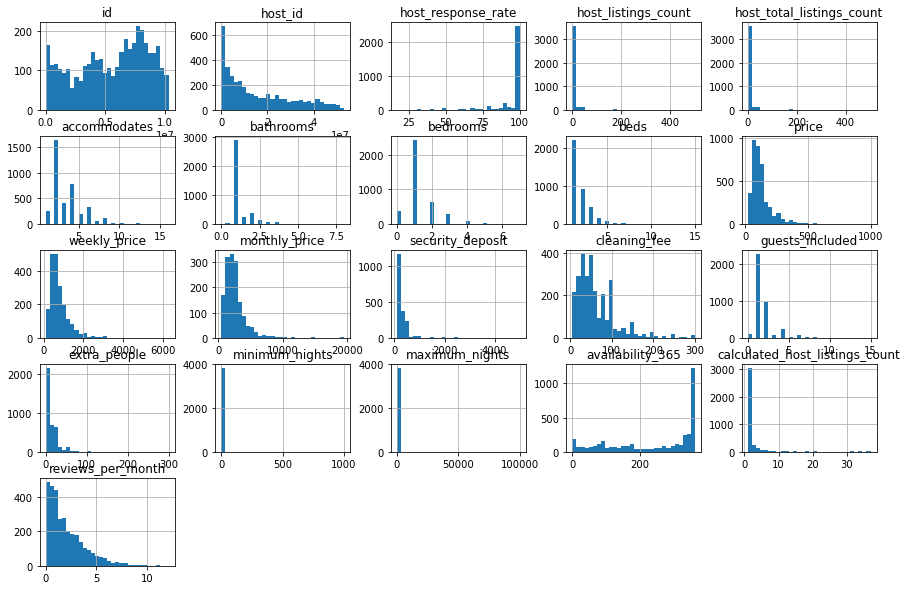

In [22]:
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column],
                        columns='% observations', 
                        normalize='columns'))
    print("# of unique values {}".format(df[column].nunique()))

# show summary statistics
display(df.describe())

# build histograms for each numeric feature
%matplotlib inline
hist = df.hist(bins=30, sharey=False, figsize=(15, 10))

A lot of columns seem to provide no value, either they have too many categorical values, or almost just 1 variable:

In [23]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_365', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

The following are the columns to be dropped, dummified and or manipulated:

Columns to be dummified:

In [24]:
df_dummies=df[['host_response_time','host_is_superhost','host_identity_verified','neighbourhood_cleansed','zipcode',
      'is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy',
       'require_guest_profile_picture','require_guest_phone_verification']]

Columns to be dropped:

In [25]:
df=df.drop(['host_since','host_acceptance_rate','host_neighbourhood','host_has_profile_pic','neighbourhood_group_cleansed',
      'neighbourhood','calendar_updated','host_response_rate'],axis=1)

Aggregating numeric columns into one df:

In [26]:
df_numeric=df.select_dtypes(include=['int64','float64','float32','int32'])

df_numeric

,id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,calculated_host_listings_count,reviews_per_month
0,241032,956883,3.0,3.0,4,1.0,1.0,1.0,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,346,2,4.07
1,953595,5177328,6.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,291,6,1.48
2,3308979,16708587,2.0,2.0,11,4.5,5.0,7.0,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,220,2,1.15
3,7421966,9851441,1.0,1.0,3,1.0,0.0,2.0,100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,143,1,NaN
4,278830,1452570,2.0,2.0,6,2.0,3.0,3.0,450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,365,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,31148752,354.0,354.0,6,2.0,3.0,3.0,359.0,NaN,NaN,NaN,230.0,1,0.0,3,1125,32,8,0.30
3814,8902327,46566046,1.0,1.0,4,1.0,1.0,2.0,79.0,NaN,NaN,500.0,50.0,3,25.0,2,29,273,1,2.00
3815,10267360,52791370,1.0,1.0,2,1.0,1.0,1.0,93.0,450.0,NaN,250.0,35.0,2,20.0,1,7,88,1,NaN
3816,9604740,25522052,1.0,1.0,2,1.0,0.0,1.0,99.0,NaN,NaN,300.0,45.0,1,0.0,3,1125,179,1,NaN


In [27]:
#df_dummies=pd.concat([df_dummies,df_amenities],axis=1)

The number of host verification methods could be correlated to the price, so the below functions are to unpack then count the number of host verification methods:

In [28]:
def str_split(df,col):
    """
    input:dataframe and a column name
    
    output:the column split into multiple columns after removing square brackets
    """
    
    df[col]=df[col].str.replace('"','')
    df[col]=df[col].str.strip(" []''")
    df=df[col].str.split(',',expand=True)
    
    return df

def row_count(df):    
    """
    input: dataframe
    output: the dataframe with a new column containing the count of non-null values in preceeding columns
    """
    df['count']=df.apply(lambda x: x.count(), axis=1)
    return df

In [29]:
host_ver_df=df[['host_verifications']]

In [30]:
df['host_verifications']=row_count(str_split(host_ver_df,'host_verifications'))[:]['count']

<ipython-input-28-07fbf0b295e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace('"','')
<ipython-input-28-07fbf0b295e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.strip(" []''")


Adding the 'host_verifications' column to the numeric dataframe:

In [31]:
df_numeric=pd.concat([df_numeric,df['host_verifications']],axis=1)

In [32]:
df_numeric

,id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,calculated_host_listings_count,reviews_per_month,host_verifications
0,241032,956883,3.0,3.0,4,1.0,1.0,1.0,85.0,NaN,...,NaN,NaN,2,5.0,1,365,346,2,4.07,4
1,953595,5177328,6.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,...,100.0,40.0,1,0.0,2,90,291,6,1.48,6
2,3308979,16708587,2.0,2.0,11,4.5,5.0,7.0,975.0,NaN,...,1000.0,300.0,10,25.0,4,30,220,2,1.15,5
3,7421966,9851441,1.0,1.0,3,1.0,0.0,2.0,100.0,650.0,...,NaN,NaN,1,0.0,1,1125,143,1,NaN,5
4,278830,1452570,2.0,2.0,6,2.0,3.0,3.0,450.0,NaN,...,700.0,125.0,6,15.0,1,1125,365,1,0.89,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,31148752,354.0,354.0,6,2.0,3.0,3.0,359.0,NaN,...,NaN,230.0,1,0.0,3,1125,32,8,0.30,5
3814,8902327,46566046,1.0,1.0,4,1.0,1.0,2.0,79.0,NaN,...,500.0,50.0,3,25.0,2,29,273,1,2.00,5
3815,10267360,52791370,1.0,1.0,2,1.0,1.0,1.0,93.0,450.0,...,250.0,35.0,2,20.0,1,7,88,1,NaN,1
3816,9604740,25522052,1.0,1.0,2,1.0,0.0,1.0,99.0,NaN,...,300.0,45.0,1,0.0,3,1125,179,1,NaN,5


Checking the data types of the numeric df:

In [33]:
for i in df_numeric.columns:
    print(f"{i:<32}" +'  : '+ str(df[i].dtypes))

id                                : int64
host_id                           : int64
host_listings_count               : float64
host_total_listings_count         : float64
accommodates                      : int64
bathrooms                         : float64
bedrooms                          : float64
beds                              : float64
price                             : float32
weekly_price                      : float32
monthly_price                     : float32
security_deposit                  : float32
cleaning_fee                      : float32
guests_included                   : int64
extra_people                      : float32
minimum_nights                    : int64
maximum_nights                    : int64
availability_365                  : int64
calculated_host_listings_count    : int64
reviews_per_month                 : float64
host_verifications                : int64


Checking the datatypes of dummies dataframe:

In [34]:
for i in df_dummies.columns:
    print(f"{i:<32}" +'  : '+ str(df_dummies[i].dtypes))

host_response_time                : object
host_is_superhost                 : object
host_identity_verified            : object
neighbourhood_cleansed            : object
zipcode                           : object
is_location_exact                 : object
property_type                     : object
room_type                         : object
bed_type                          : object
instant_bookable                  : object
cancellation_policy               : object
require_guest_profile_picture     : object
require_guest_phone_verification  : object


Dropping id and host_id columns:

In [35]:
df_numeric=df_numeric.drop(['id','host_id'],axis=1)

<a id='prep'></a>
## Data Preparation for the Model

Plotting the correlation heatmap to see if there's correlation between features:

<AxesSubplot:>

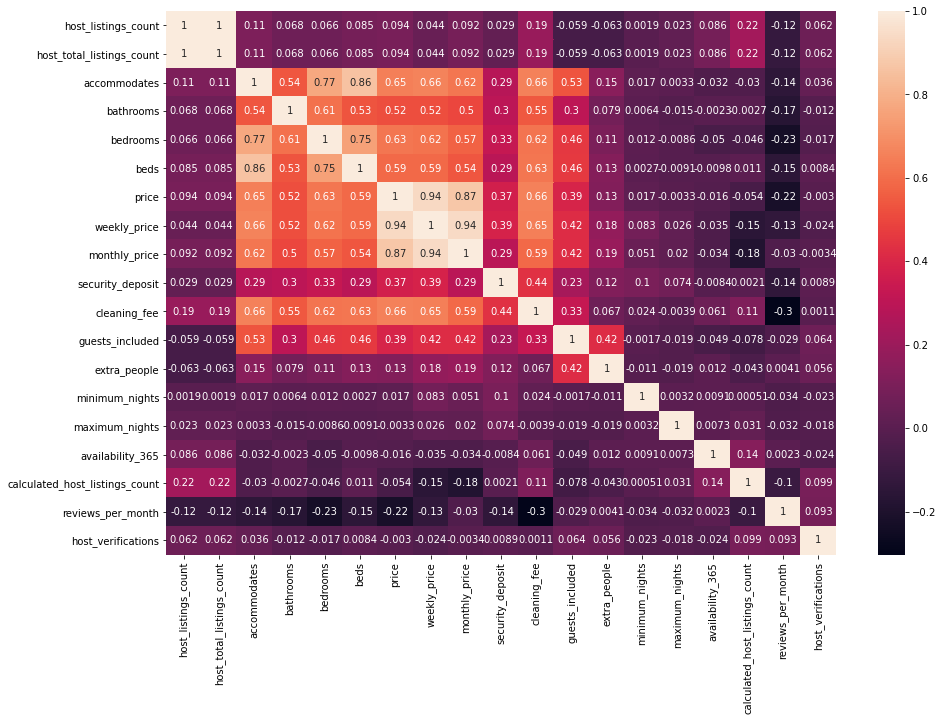

In [37]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_numeric.corr(), annot=True)

There seem to be correlation between features, will have to iterate through columns to see which will return the best fit

Setting up the target for our model which will be the log for the 'price' column:

In [38]:
y=np.log(df_numeric['price'])
df_numeric=df_numeric.drop(['price'],axis=1)

Checking for nulls in the features:

In [39]:
for i in df_numeric.columns:
    print(f"{i:<32}" +' %  Nulls: ' + f"{str(int((df[i].isnull().sum()/len(df))*100)) : >10}")

host_listings_count              %  Nulls:          0
host_total_listings_count        %  Nulls:          0
accommodates                     %  Nulls:          0
bathrooms                        %  Nulls:          0
bedrooms                         %  Nulls:          0
beds                             %  Nulls:          0
weekly_price                     %  Nulls:         47
monthly_price                    %  Nulls:         60
security_deposit                 %  Nulls:         51
cleaning_fee                     %  Nulls:         26
guests_included                  %  Nulls:          0
extra_people                     %  Nulls:          0
minimum_nights                   %  Nulls:          0
maximum_nights                   %  Nulls:          0
availability_365                 %  Nulls:          0
calculated_host_listings_count   %  Nulls:          0
reviews_per_month                %  Nulls:         16
host_verifications               %  Nulls:          0


Filling the nulls with the mean of each column

In [40]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

Checking how many columns we will have:

In [41]:
df_numeric.shape[1]+df_dummies.shape[1]+df_amenities.shape[1]

73

Create a function that adds a column at a time, trains the model using linear regression, scores it and if the score is higher than before adding the column, it keeps the column, if its the same or not, it drops the column and continues to the next column:

In [42]:
def iterate1(df_numeric,df_dummies,df_amenities):
    """
    input: 3 dataframes
    
    output:the dataframe that yielded the best R2 Score after iterating through all the columns of the 3 dataframes
        
    """
    score1=[]
    score2=[]
    for i in range(len(df_numeric.columns)):
        
        df1=df_numeric.iloc[:,i]
        if i==0: 
            df2=pd.concat([df_amenities,df1],axis=1)
            df3=df2
        elif i>0:
            df2=pd.concat([df2,df1],axis=1)
        
        X=df2
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

        lr=LinearRegression(normalize=True)

        lr.fit(X_train,y_train)

        y_pred=lr.predict(X_test)

        score1.append(r2_score(y_test,y_pred))
        
        if score1[i]>(score1[i-1]):
            df3=X
    
        
    for j in range(len(df_dummies.columns)):
        df1=pd.get_dummies(df_dummies.iloc[:,j],dummy_na=False)
        if j==0:
            df4=pd.concat([df3,df1],axis=1)
            df5=df4
        elif i>0:
            df4=pd.concat([df4,df1],axis=1)
        X=df4
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=40)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=40)

        lr=LinearRegression()

        lr.fit(X_train,y_train)

        y_pred=lr.predict(X_test)

        score2.append(r2_score(y_test,y_pred))
        
        if score1[i]>(score1[i-1]):
            df5=X
        
        
    return  df5



    

iterate1(df_numeric,df_dummies,df_amenities)


   

,TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer,...,extra_people,minimum_nights,maximum_nights,availability_365,calculated_host_listings_count,reviews_per_month,a few days or more,within a day,within a few hours,within an hour
0,0,0,0,0,0,0,0,0,0,0,...,5.0,1,365,346,2,4.070000,0,0,1,0
1,1,0,1,1,0,1,1,1,1,1,...,0.0,2,90,291,6,1.480000,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,25.0,4,30,220,2,1.150000,0,0,1,0
3,0,0,1,1,0,1,1,1,1,1,...,0.0,1,1125,143,1,2.078919,0,0,0,0
4,1,1,1,1,0,1,1,1,0,0,...,15.0,1,1125,365,1,0.890000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,1,1,1,1,1,1,1,1,1,...,0.0,3,1125,32,8,0.300000,0,0,1,0
3814,1,1,1,1,0,1,1,1,0,0,...,25.0,2,29,273,1,2.000000,0,0,0,1
3815,0,1,0,1,0,1,1,0,1,1,...,20.0,1,7,88,1,2.078919,0,0,0,0
3816,1,0,0,1,0,1,1,0,0,0,...,0.0,3,1125,179,1,2.078919,0,0,0,1


The same as the function iterate1 but uses Random Forest instead of Linear Regression:

In [43]:
def iterate2(df_numeric,df_dummies,df_amenities):
    
    """
    input: 3 dataframes
    
    output:the dataframe that yielded the best R2 Score after iterating through all the columns of the 3 dataframes
        
    """
    score1=[]
    score2=[]
    for i in range(len(df_numeric.columns)):
        
        df1=df_numeric.iloc[:,i]
        if i==0: 
            df2=pd.concat([df_amenities,df1],axis=1)
            df3=df2
        elif i>0:
            df2=pd.concat([df2,df1],axis=1)
        
        X=df2
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

        lr=LinearRegression(normalize=True)

        lr.fit(X_train,y_train)

        y_pred=lr.predict(X_test)

        score1.append(r2_score(y_test,y_pred))
        
        if score1[i]>(score1[i-1]):
            df3=X
    
        
    for j in range(len(df_dummies.columns)):
        df1=pd.get_dummies(df_dummies.iloc[:,j],dummy_na=False)
        if j==0:
            df4=pd.concat([df3,df1],axis=1)
            df5=df4
        elif i>0:
            df4=pd.concat([df4,df1],axis=1)
        X=df4
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

        RF=RandomForestRegressor(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =40, max_features = "auto",
                                  max_leaf_nodes = 500, max_depth=32, warm_start=True)

        RF.fit(X_train,y_train)

        y_pred_RF=RF.predict(X_test)

        r2_score(y_test,y_pred_RF)

        
        score2.append(r2_score(y_test,y_pred))
        
        if score1[i]>(score1[i-1]):
            df5=X
        
        
    return  df5



    

iterate2(df_numeric,df_dummies,df_amenities)

,TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer,...,extra_people,minimum_nights,maximum_nights,availability_365,calculated_host_listings_count,reviews_per_month,a few days or more,within a day,within a few hours,within an hour
0,0,0,0,0,0,0,0,0,0,0,...,5.0,1,365,346,2,4.070000,0,0,1,0
1,1,0,1,1,0,1,1,1,1,1,...,0.0,2,90,291,6,1.480000,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,25.0,4,30,220,2,1.150000,0,0,1,0
3,0,0,1,1,0,1,1,1,1,1,...,0.0,1,1125,143,1,2.078919,0,0,0,0
4,1,1,1,1,0,1,1,1,0,0,...,15.0,1,1125,365,1,0.890000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,1,1,1,1,1,1,1,1,1,...,0.0,3,1125,32,8,0.300000,0,0,1,0
3814,1,1,1,1,0,1,1,1,0,0,...,25.0,2,29,273,1,2.000000,0,0,0,1
3815,0,1,0,1,0,1,1,0,1,1,...,20.0,1,7,88,1,2.078919,0,0,0,0
3816,1,0,0,1,0,1,1,0,0,0,...,0.0,3,1125,179,1,2.078919,0,0,0,1


In [44]:
df_numeric.columns

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'calculated_host_listings_count', 'reviews_per_month',
       'host_verifications'],
      dtype='object')

Saving the features to the X variable by calling the iterate function **

In [45]:
X=iterate1(df_numeric,df_dummies,df_amenities)

** Both Iterate functions resulted in exactly the same score

<a id='model'></a>
## Training and Scoring the Model

Training a Linear Regression model and getting its R2 score:

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=40)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=40)

lr=LinearRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

r2_score(y_test,y_pred)

0.6374121132097856

Training a Random Forest model and getting its R2 score:

### Answering Question 1:

In [47]:
RF=RandomForestRegressor(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =40, max_features = "auto",
                                  max_leaf_nodes = 600, max_depth=40, warm_start=False)

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score(y_test,y_pred_RF)

0.7766556076604405

As we can see Random Forest model performed a lot better than the linear regression model. But this could be due to overfitting on the testing set since a lot of adjustments has been made to get that score

So we will check the score based on the validation set that has been reserved from the beginning

In [48]:
y_pred_val=RF.predict(X_val)
r2_score(y_val,y_pred_val)

0.769114871078713

It seems that the model behaved almost the same on the testing and validation sets which means that this score is legitimate as the final score of the model

Below is the most important features from the Random forest model that the prediction were based on descending order:

In [61]:
important_features = pd.Series(data=RF.feature_importances_,index=X_train.columns)
print(important_features.sort_values(ascending=False))


bedrooms              3.881681e-01
weekly_price          2.337496e-01
cleaning_fee          4.382627e-02
accommodates          4.189559e-02
reviews_per_month     3.427728e-02
                          ...     
"Smoking Allowed"     9.511399e-04
Doorman               6.473873e-04
a few days or more    3.497058e-04
"Other pet(s)"        1.756814e-04
"Washer / Dryer"      1.680687e-07
Length: 63, dtype: float64


### Answering Question 2:

Lets see the effect of each categorical variable alone assuming all other variables remain constant:

<ipython-input-50-3c70dfd4db9e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 2))


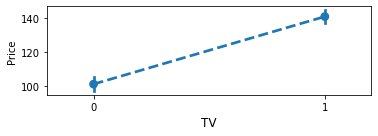

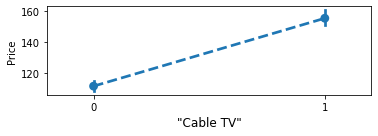

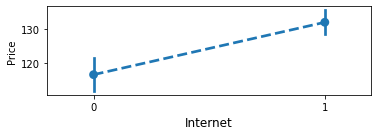

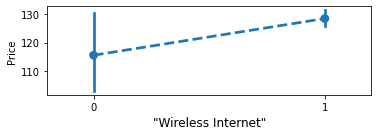

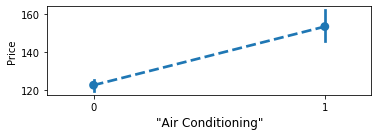

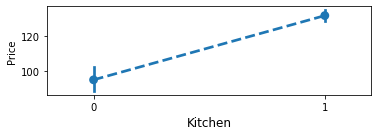

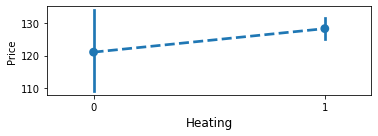

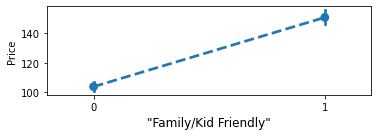

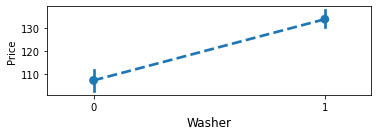

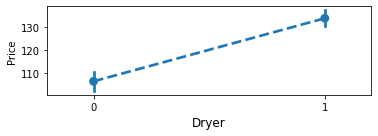

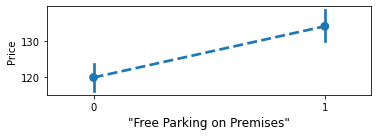

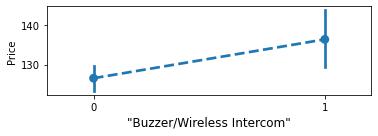

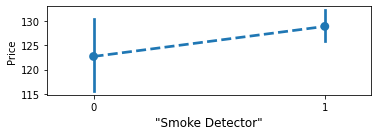

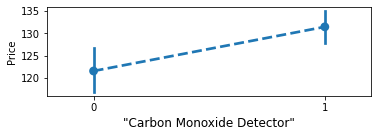

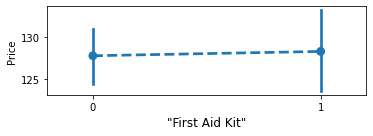

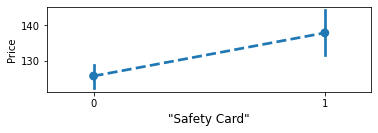

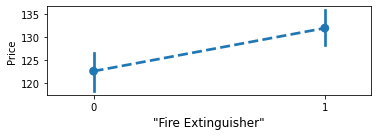

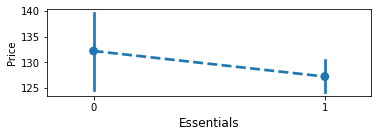

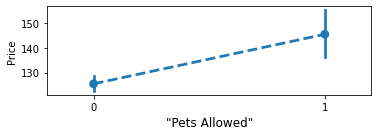

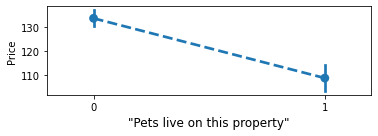

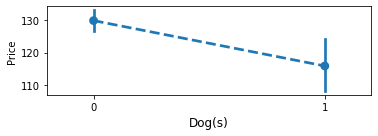

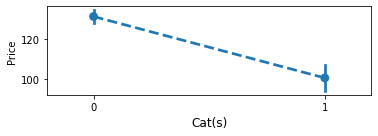

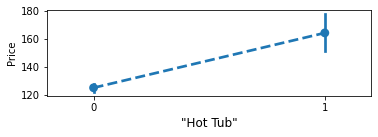

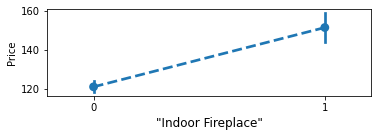

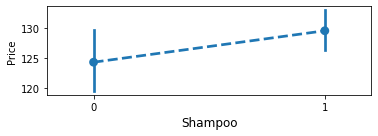

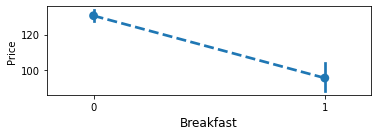

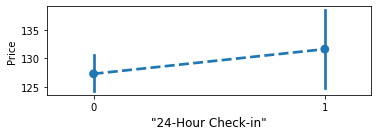

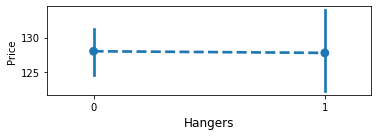

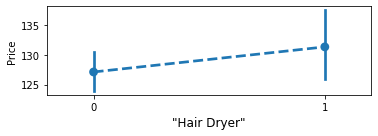

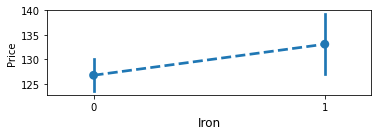

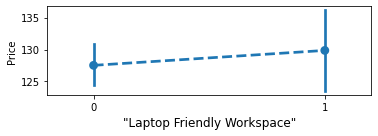

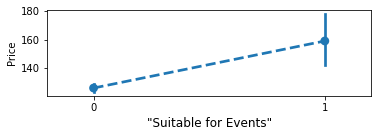

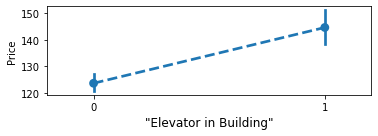

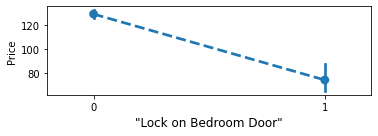

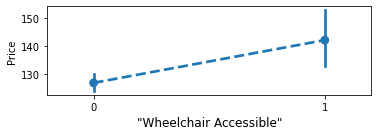

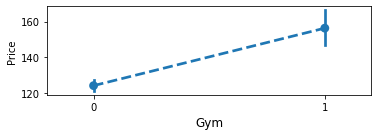

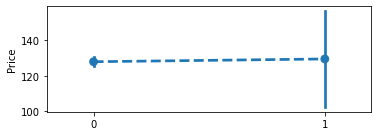

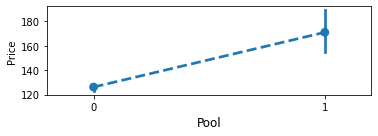

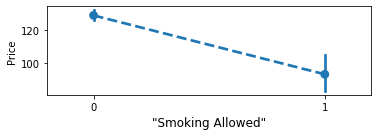

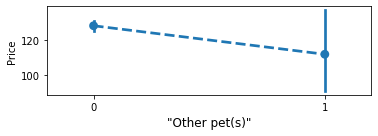

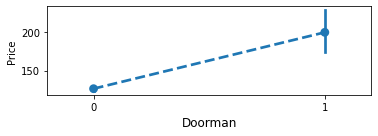

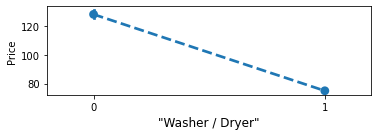

In [50]:
for col in df_amenities.columns:
    fig = plt.figure(figsize=(10, 2))
    plt.subplot(1,2,1)
    ax = fig.gca()
    sns.pointplot(data = df_amenities, x = col, y =df['price'],linestyles = "--" , ax = ax)
    ax.set_ylabel("Price")
    ax.set_xlabel(col, fontsize = 12)
    plt.xlim(-0.2,1.2)
    

    plt.tight_layout()